# Euro-USD exchange rates under Bush, Obama and Trump

`Category: Storytelling Data Visualization`

In this mini-project, we're going to look at the Euro/US dollar exchange rate trends during the presidencies of George W. Bush (2001-2009), Barack Obama (2009-2017) and Donald Trump (2017-2021).<br /> 
The Euro/USD exchange rate is the price of the US dollar in Euro, i.e. how many US dollars will be exchanged with one Euro.

The dataset is a collection of daily Euro exchange rates for several currencies, from January 1999 to March 2021. The source is the European Central Bank, while the dataset can be downloaded from Kaggle, [here](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020).

The project's goal is to practice with data visualization techniques. We aim at drawing a chart which conveys some information about exchange rates in a clear and precise way, avoiding distracting elements. We'll use matplotlib as our visualization library. 

In [1]:
import pandas as pd

# reading the dataset into a dataframe
exchange_rates = pd.read_csv('datasets/euro-daily-hist_1999_2020.csv')

## Dataset preview

In [2]:
exchange_rates.head(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-03-26,1.5459,1.9558,6.7110,1.4814,1.1090,7.7063,NaN,26.081,7.4361,...,4.8878,89.5075,10.1905,1.5865,NaN,NaN,36.6540,9.4523,1.1782,17.6845
1,2021-03-25,1.5548,1.9558,6.6960,1.4849,1.1045,7.7220,NaN,26.233,7.4360,...,4.8865,90.0115,10.1935,1.5899,NaN,NaN,36.7460,9.4313,1.1802,17.6852
2,2021-03-24,1.5532,1.9558,6.5258,1.4884,1.1068,7.7133,NaN,26.206,7.4360,...,4.8880,90.2013,10.1635,1.5917,NaN,NaN,36.6580,9.4009,1.1825,17.5248


In [3]:
exchange_rates.tail(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5751,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5752,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5753,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


The column `Period\Unit` is the date, all other columns represent currencies with their exchange rates.<br />
Let's look at the datatypes.

In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5754 non-null   object 
 1   [Australian dollar ]      5754 non-null   object 
 2   [Bulgarian lev ]          5352 non-null   object 
 3   [Brazilian real ]         5486 non-null   object 
 4   [Canadian dollar ]        5754 non-null   object 
 5   [Swiss franc ]            5754 non-null   object 
 6   [Chinese yuan renminbi ]  5486 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5754 non-null   object 
 9   [Danish krone ]           5754 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5754 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5754 non-null   object 
 14  [Croatia

All columns but three are string type. We need to select the date and the US dollar columns and convert them to **datetime** and **float** type, respectively.<br />We'll do this in the cleaning section.

## Cleaning

In [5]:
# change names to the columns of interest 
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 
                               'Period\\Unit:': 'Time'}, 
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])  # convert to datetime type
exchange_rates.sort_values('Time', inplace=True)  # sort dates in ascending order
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
# create a new dataframe with USD data
euro_to_dollar = exchange_rates[['US_dollar', 'Time']]

In [7]:
# searching for null/NaN/missing values in the USD column
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
1.4969     1
1.0862     1
1.3370     1
1.2677     1
1.2670     1
Name: US_dollar, Length: 3543, dtype: int64

The `US_dollar` column contains 62 missing values, represented by a dash. We're going to drop those rows from the dataframe.

In [8]:
# drop all rows for which 'US_dollar' contains the '-' character
euro_to_dollar = euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'].str.contains('-')].index)
# finally convert the US_dollar column to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')

We're now ready to build our storytelling chart.

## Creating the chart

Let's take a quick look at the data with a line plot.

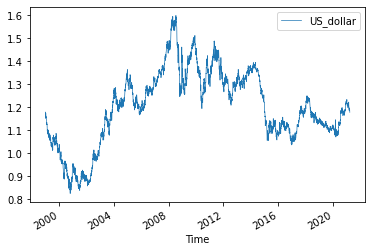

In [9]:
import matplotlib.pyplot as plt
# magic function used in order to visualize matplotlib charts in the notebook
%matplotlib inline  

euro_to_dollar.plot('Time', 'US_dollar', linewidth=0.7)

plt.show()

The wiggles are to be expected, because the exchange rate varies from day to day. Nonetheless, we're interested in showing a general trend over the years, so these wiggles are a distracting element for us.<br />
In order to smooth out the graph, we're going to use a rolling mean (aka 'moving mean') i.e. each point will represent the average of the exchange rate in the last 60 days.

In [10]:
# create a new column using rolling mean (with a window of 2 months)
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(60).mean()

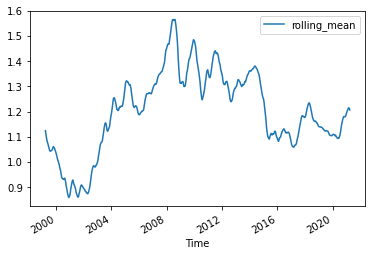

In [11]:
euro_to_dollar.plot('Time', 'rolling_mean')
plt.show()

The graph is much smoother now.

In the next cell, we will build the chart using Matplotplib.<br />
We're assuming the chart will be visualized on a smartphone, so the three lineplots are piled one on top of the other.

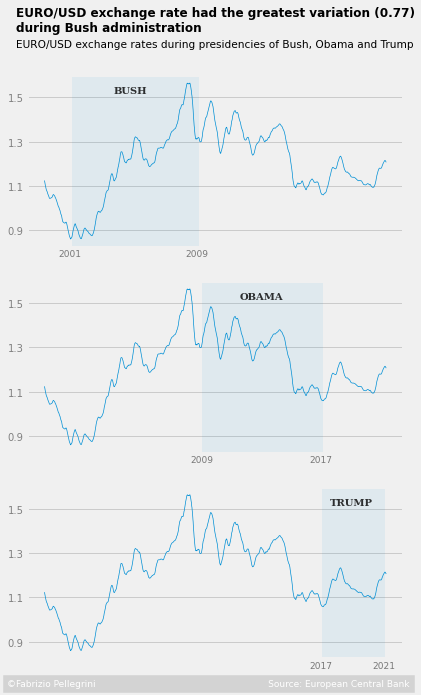

In [13]:
import matplotlib.style as style
style.use('fivethirtyeight')  # using the style from the fivethirtyeight website

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

for i in range(3):
    axs[i].plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], linewidth=0.7)
    axs[i].set_xticks([])
    axs[i].tick_params(axis='y', labelsize=10, colors='grey')
    axs[i].set_yticks([0.9,1.1,1.3,1.5])
    
# customize Bush plot    
axs[0].text(10000, 1.8, 'EURO/USD exchange rate had the greatest variation (0.77)\nduring Bush administration', weight='bold',  size=12)
axs[0].text(10000, 1.73, 'EURO/USD exchange rates during presidencies of Bush, Obama and Trump', size=10.5)
axs[0].axvline(12803, linewidth=127, alpha=0.07)
axs[0].text(12300, 1.52, 'BUSH', fontname='serif', alpha=0.8, weight='bold', size=10)
axs[0].text(11000, 0.78, '2001', size=9, alpha=0.5)
axs[0].text(14000, 0.78, '2009', size=9, alpha=0.5)

# customize Obama plot
axs[1].axvline(15800, linewidth=121, alpha=0.07)
axs[1].text(15270, 1.52, 'OBAMA', fontname='serif', alpha=0.8, weight='bold', size=10)
axs[1].text(14100, 0.78, '2009', size=9, alpha=0.5)
axs[1].text(16900, 0.78, '2017', size=9, alpha=0.5)

# customize Trump plot
axs[2].axvline(17930, linewidth=63, alpha=0.07)
axs[2].text(17400, 1.52, 'TRUMP', fontname='serif', alpha=0.8, weight='bold', size=10)
axs[2].text(16900, 0.78, '2017', size=9, alpha=0.5)
axs[2].text(18400, 0.78, '2021', size=9, alpha=0.5)
axs[2].text(9800, 0.7, '©Fabrizio Pellegrini' + ' ' * 60 + 'Source: European Central Bank',
            size=9, backgroundcolor='#D3D3D3', color='white')

plt.show()

## Conclusion

In this mini-project, we've built a storytelling chart which represents the Euro-USD exchange rate trend under the three last US presidents.<br /> We've tried to convey the information in the clearest way, using design priciples like enclosure and maximizing data-ink ratio.